In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle 
import os

In [31]:
# Path relativ to the Notebook
data_path = os.path.join("..", "data", "Worksheet in Case Study question 2.xlsx")

# Read the dataset
df = pd.read_excel(data_path)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


# Explorative Analysis

### Dataset Overview

In [ ]:
df.shape # Display the shape of the data
df.info()  # Data types and non-null counts
df.describe() # Summary stats for numeric columns

In [27]:
df.head() # First few rows

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2014
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,2006
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2000
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,2014


### Missing Values

In [32]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

authorities_contacted          91
age                             0
months_as_customer              0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_number                   0
policy_deductable               0
policy_annual_premium           0
insured_zip                     0
umbrella_limit                  0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_sex                     0
insured_relationship            0
capital-gains                   0
incident_date                   0
capital-loss                    0
incident_type                   0
collision_type                  0
incident_severity               0
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [34]:
# Get all columns with at least one missing value
cols_with_nan = df.columns[df.isnull().any()].tolist()

print("Columns with missing values:", cols_with_nan)

Columns with missing values: ['authorities_contacted']


In [15]:
#Missing values in the authorities_contacted variable are replaced with "Unknown"
df['authorities_contacted'].fillna('Unknown', inplace=True)

# Replace the "?" values in the collision_type column whith "Unknown"
df['collision_type'] = df['collision_type'].replace('?', 'Unknown')

# Replace the "?" values in the property_damage column whith "Unknown"
df['property_damage'] = df['property_damage'].replace('?', 'Unknown')



C:\Users\dakno\AppData\Local\Temp\ipykernel_5176\3479386833.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['authorities_contacted'].fillna('Unknown', inplace=True)


### Target Variable

In [35]:
df['fraud_reported'].value_counts(normalize=True)

fraud_reported
N    0.753
Y    0.247
Name: proportion, dtype: float64

<Axes: xlabel='fraud_reported', ylabel='count'>

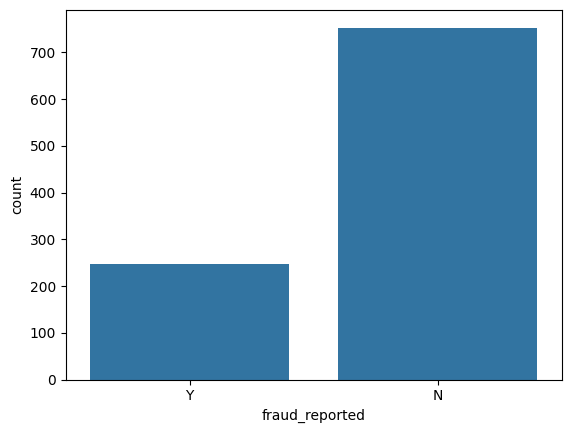

In [36]:
# # Count the distribution of values in the response variable fraud_reported
sns.countplot(x='fraud_reported', data=df)

In [17]:
# Get all exisiting data types in the dataframes
df.dtypes.unique()

array([dtype('int64'), dtype('<M8[ns]'), dtype('O'), dtype('float64')],
      dtype=object)

In [18]:
# Get all numeric (int + float) columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_cols)

# Get all datetime ('<M8[ns]') columns
datetime_cols = df.select_dtypes(include=['<M8[ns]']).columns.tolist()
print(datetime_cols)

# get all object columns
object_cols = df.select_dtypes(include=['object']).columns.tolist()
print(object_cols)

['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']
['policy_bind_date', 'incident_date']
['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


### Date and Time Features

<Axes: xlabel='incident_month', ylabel='count'>

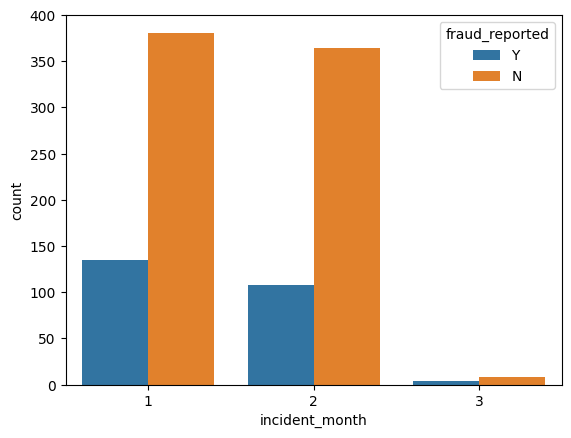

In [38]:
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_month'] = df['incident_date'].dt.month
sns.countplot(x='incident_month', hue='fraud_reported', data=df)

<Axes: xlabel='days_active', ylabel='Count'>

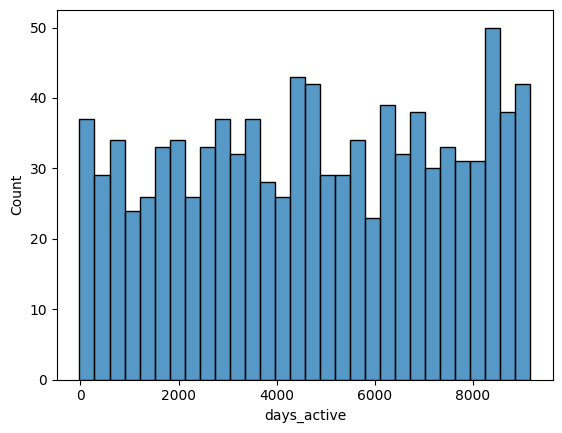

In [42]:
# Time between Policy start and incident
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['days_active'] = (df['incident_date'] - df['policy_bind_date']).dt.days
sns.histplot(df['days_active'], bins=30)

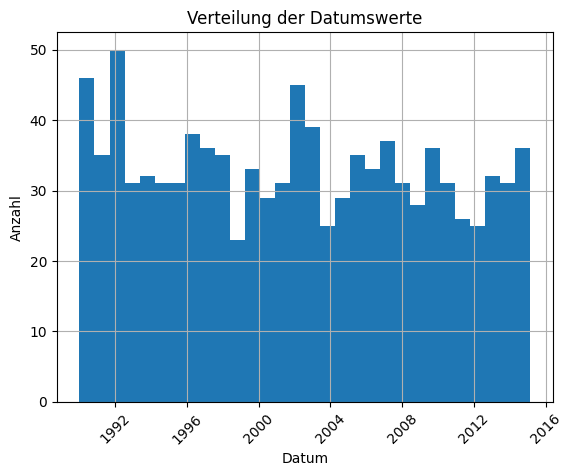

In [19]:
# Distribution of the date

df['policy_bind_date'].hist(bins=30)
plt.xlabel('Datum')
plt.ylabel('Anzahl')
plt.title('Verteilung der Datumswerte')
plt.xticks(rotation=45)
plt.show()

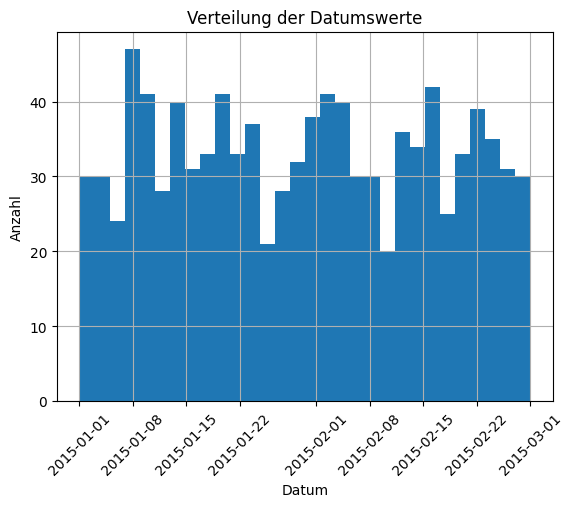

In [20]:
df['incident_date'].hist(bins=30)
plt.xlabel('Datum')
plt.ylabel('Anzahl')
plt.title('Verteilung der Datumswerte')
plt.xticks(rotation=45)
plt.show()

### Numerical Features

array([[<Axes: title={'center': 'months_as_customer'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'policy_number'}>,
        <Axes: title={'center': 'policy_deductable'}>],
       [<Axes: title={'center': 'policy_annual_premium'}>,
        <Axes: title={'center': 'umbrella_limit'}>,
        <Axes: title={'center': 'insured_zip'}>,
        <Axes: title={'center': 'capital-gains'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'incident_hour_of_the_day'}>,
        <Axes: title={'center': 'number_of_vehicles_involved'}>,
        <Axes: title={'center': 'bodily_injuries'}>],
       [<Axes: title={'center': 'witnesses'}>,
        <Axes: title={'center': 'total_claim_amount'}>,
        <Axes: title={'center': 'injury_claim'}>,
        <Axes: title={'center': 'property_claim'}>],
       [<Axes: title={'center': 'vehicle_claim'}>,
        <Axes: title={'center': 'auto_year'}>, <Axes: >, <Axes: >]],
      dtype=object)

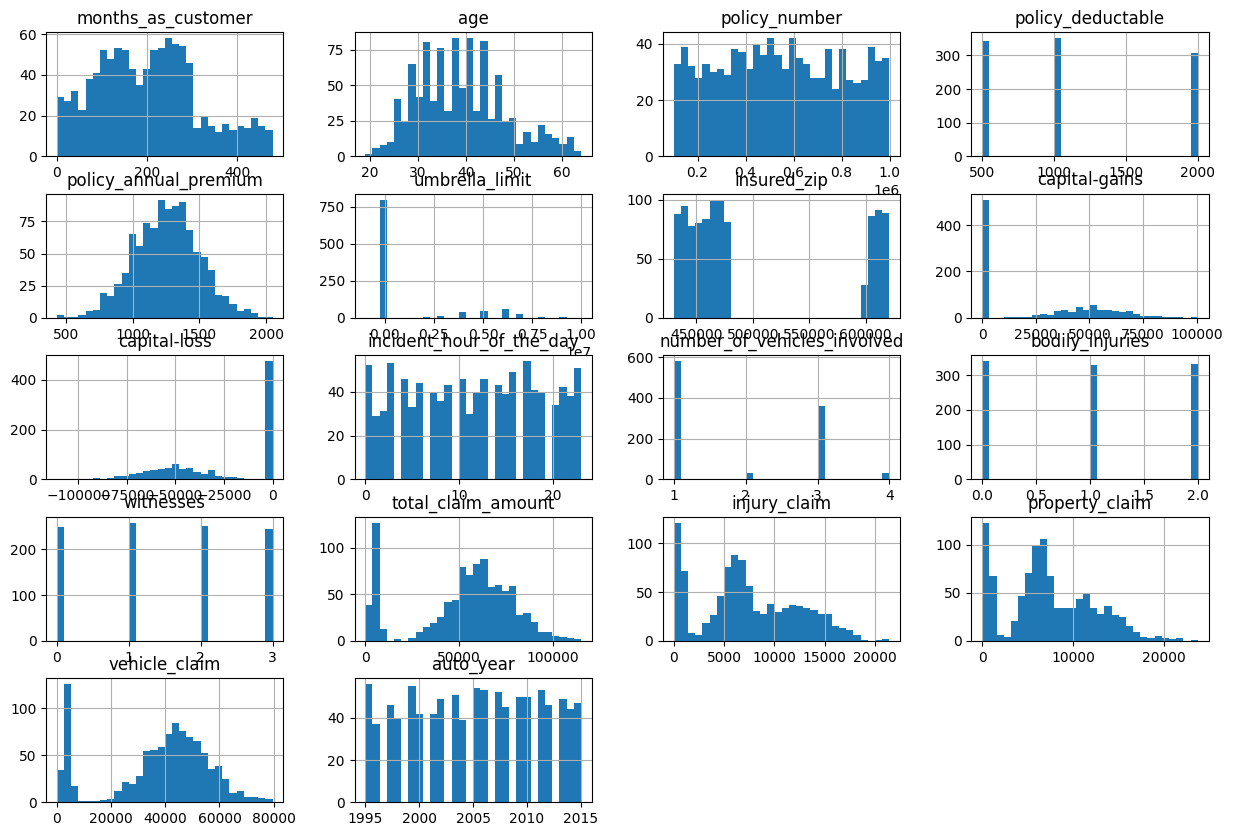

In [21]:
df[numeric_cols].hist(figsize=(15, 10), bins=30)     # Distribution of the numerical variables

In [ ]:
df.corr(numeric_only=True) # Display the correlationmatrix

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


<Axes: >

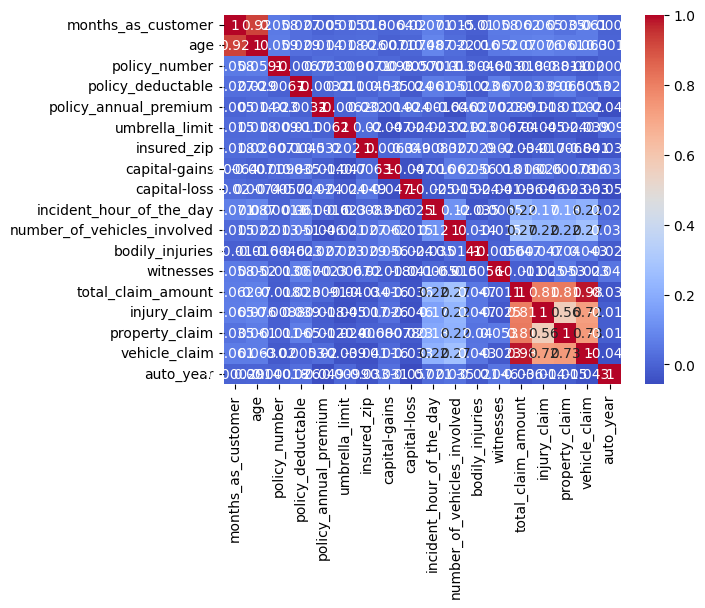

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')  # Heatmap of the correlationmatrix

### Categorical Features

policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64


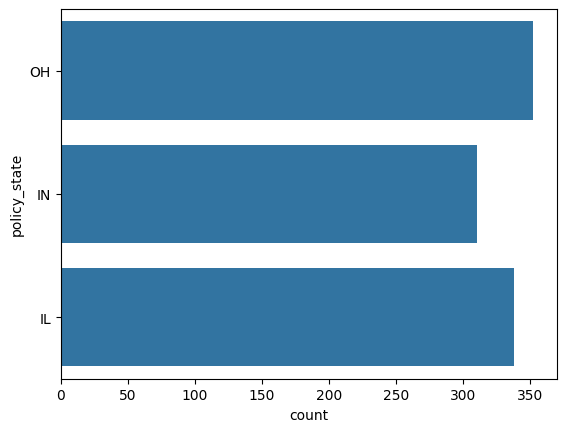

policy_csl
250/500     351
100/300     349
500/1000    300
Name: count, dtype: int64


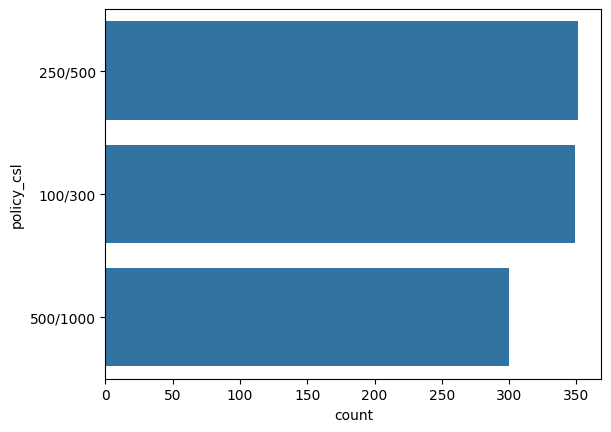

insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64


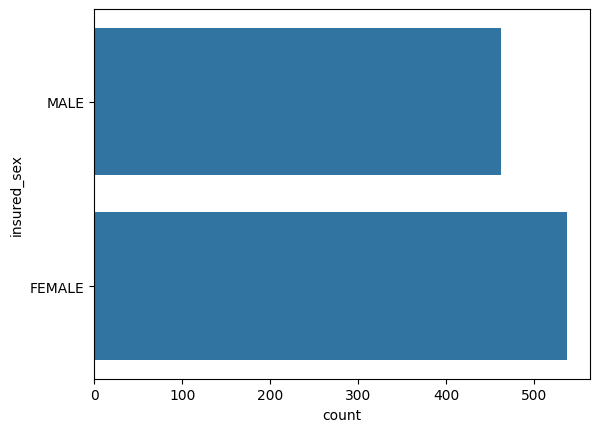

insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64


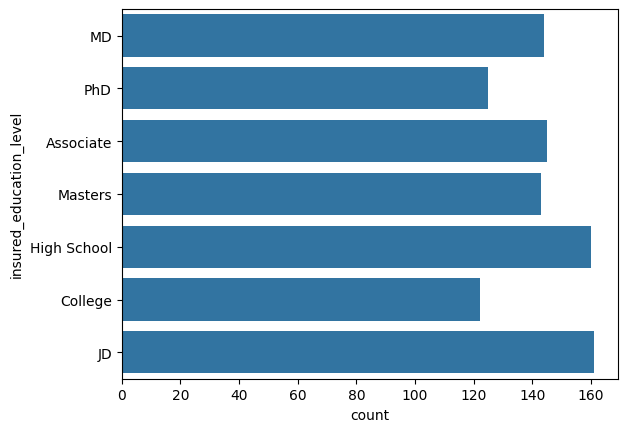

insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64


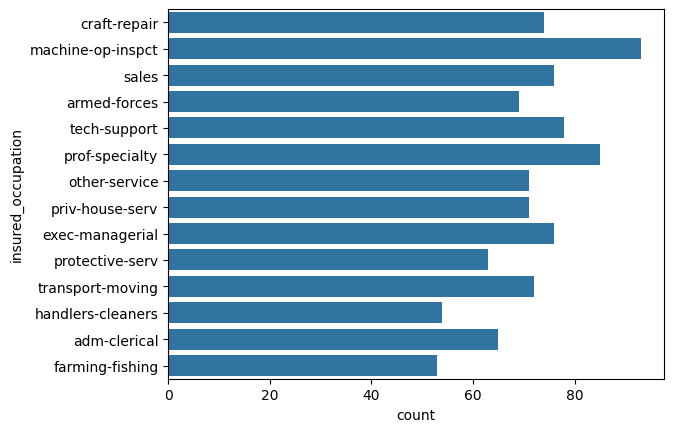

insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: count, dtype: int64


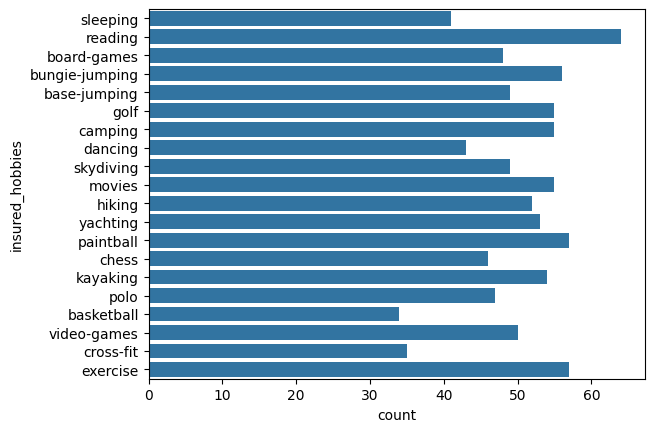

insured_relationship
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: count, dtype: int64


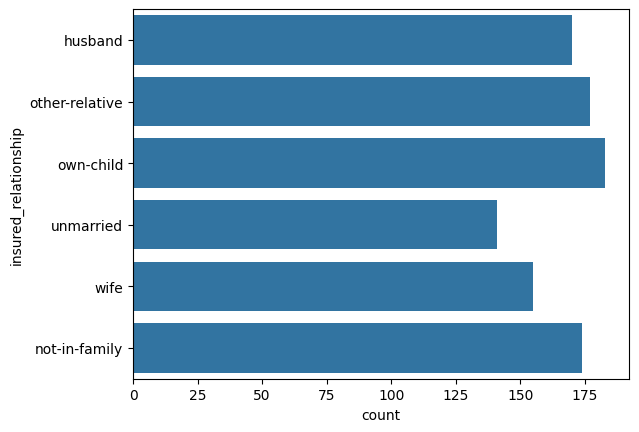

incident_type
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: count, dtype: int64


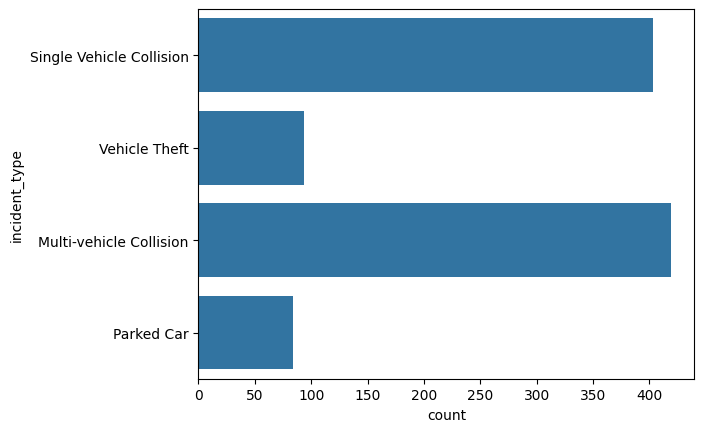

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
Unknown            178
Name: count, dtype: int64


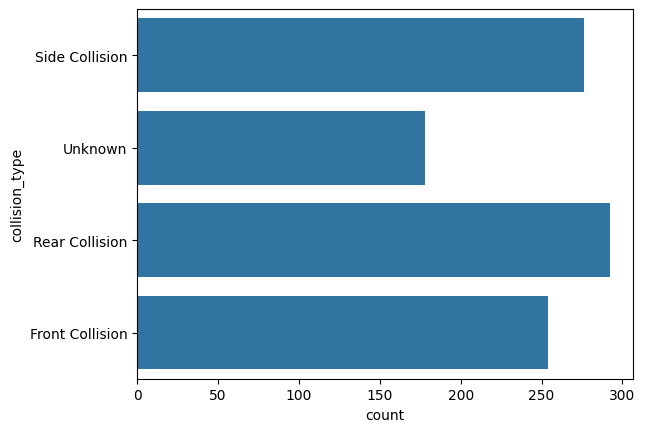

incident_severity
Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: count, dtype: int64


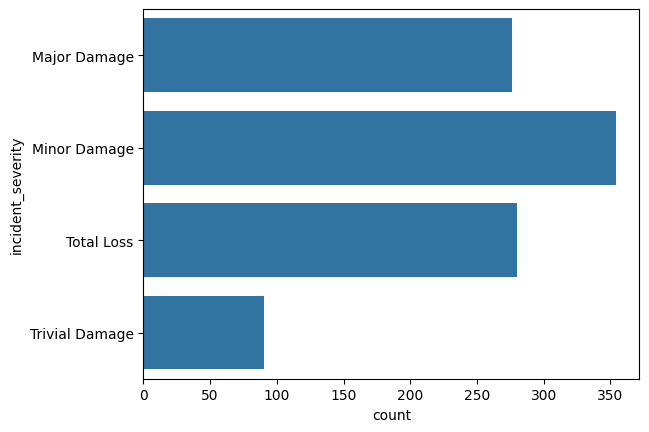

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Unknown       91
Name: count, dtype: int64


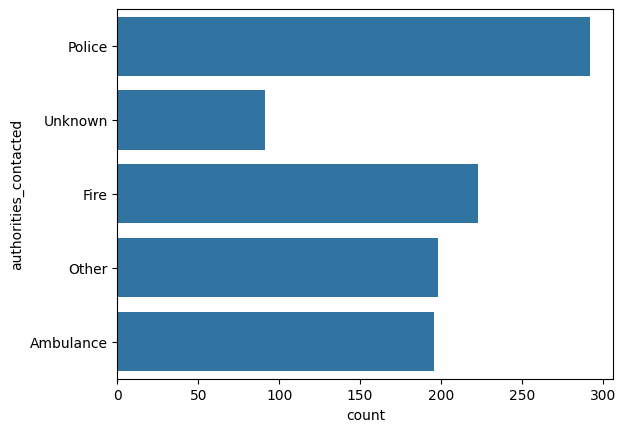

incident_state
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: count, dtype: int64


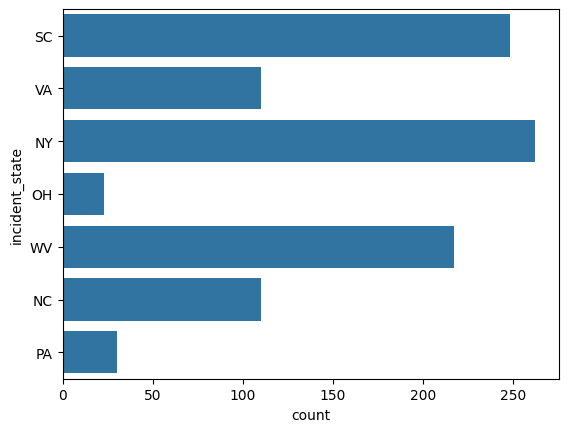

incident_city
Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: count, dtype: int64


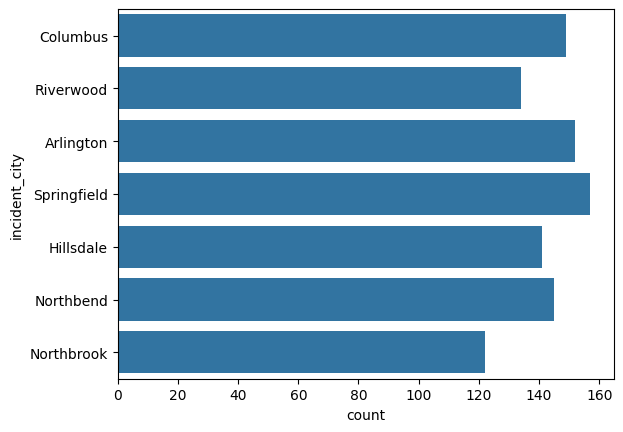

incident_location
1416 Cherokee Ridge    1
9935 4th Drive         1
6608 MLK Hwy           1
7121 Francis Lane      1
6956 Maple Drive       1
                      ..
6655 5th Drive         1
5971 5th Hwy           1
1558 1st Ridge         1
3066 Francis Ave       1
4872 Rock Ridge        1
Name: count, Length: 1000, dtype: int64


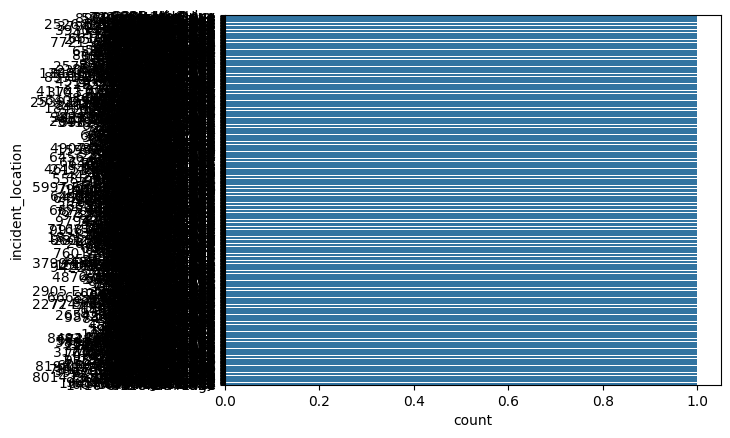

property_damage
Unknown    360
NO         338
YES        302
Name: count, dtype: int64


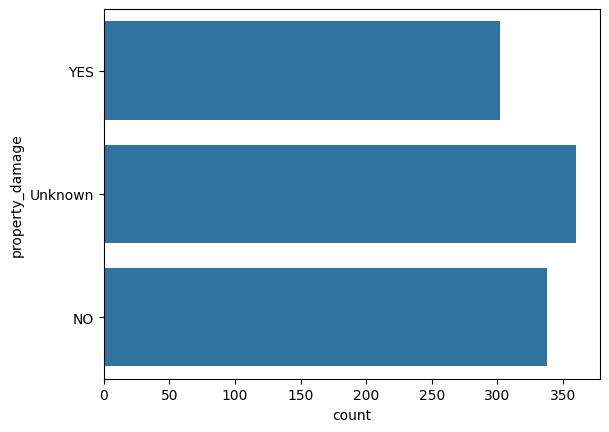

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64


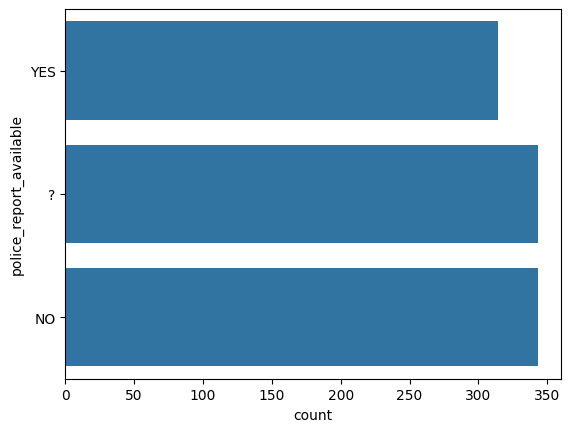

auto_make
Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: count, dtype: int64


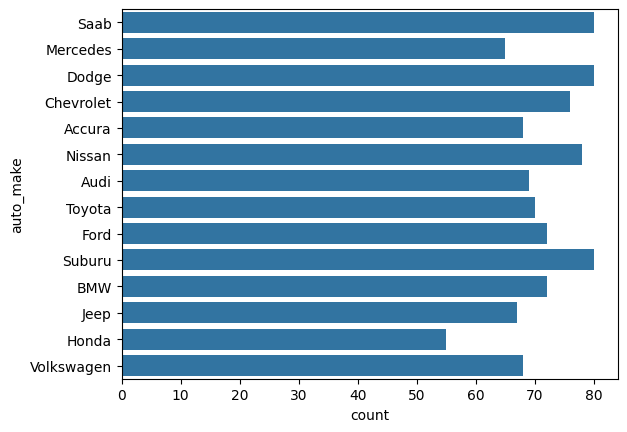

auto_model
RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
E400              27
95                27
F150              27
Grand Cherokee    25
93                25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
TL                20
Impreza           20
Corolla           20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: count, dtype: int64


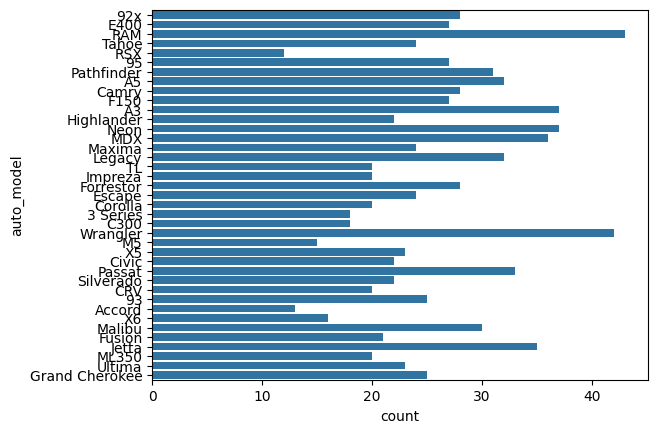

fraud_reported
N    753
Y    247
Name: count, dtype: int64


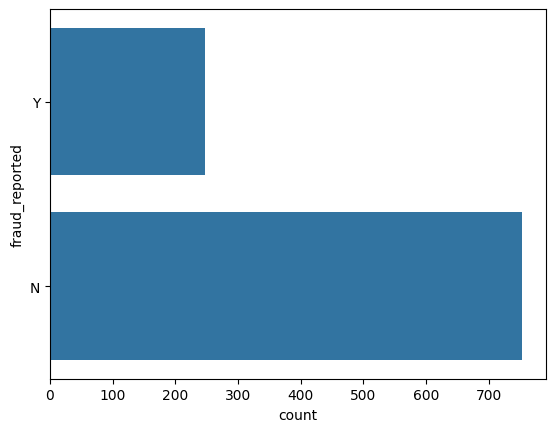

In [23]:
#Which categories occur frequently
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    print(df[col].value_counts())
    sns.countplot(y=col, data=df)
    plt.show()

In [ ]:
pd.crosstab(df['policy_state'], df['fraud_reported'], normalize='index') # Cross-tab with fraud

fraud_reported,N,Y
policy_state,,
IL,0.772189,0.227811
IN,0.745161,0.254839
OH,0.741477,0.258523


<Axes: xlabel='policy_bind_year', ylabel='Count'>

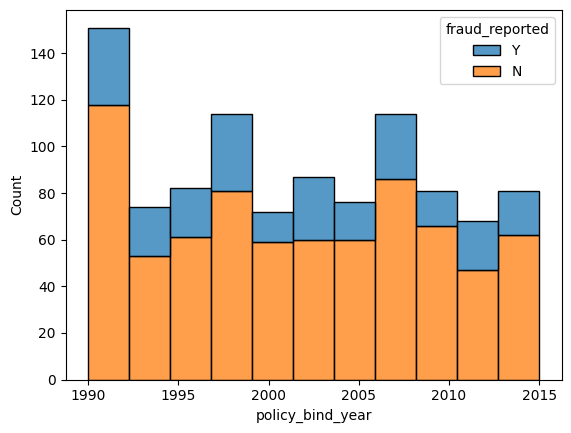

In [25]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_year'] = df['policy_bind_date'].dt.year
sns.histplot(data=df, x='policy_bind_year', hue='fraud_reported', multiple='stack')

### Save the processed dataframe into a pickle file

In [ ]:
df.to_pickle("../data/processed/fraud_df.pkl")